**Title**: Predictive Modeling for Specialist Treatment Need in Students

**Objective:**
The primary goal of this project is to develop a predictive model to assess, whether students may require specialist treatment.


**Dataset:**
The dataset utilized in this project comprises student information including,

timestamp, gender, age, course, current year of study, CGPA, 
marital status, depression, anxiety, and panic attacks.

**Data Preprocessing:**
use libraries such as NumPy and Pandas for cleaning and organizing the data. 

**Data Visualization:**
Matplotlib and Seaborn libraries are used for data visualization.


**Machine Learning Algorithm:**
The chosen machine learning algorithm for this predictive model is Gaussian Naive Bayes. 

**Training and Testing:**
The dataset is split into training and testing sets using the train-test split method. 


**Accuracy Metrics:**
Accuracy_score and Confusion Matrix are employed as the accuracy check metrics. 

**Model Saving and Deployment:**
Upon successful training, the Gaussian Naive Bayes model is saved for future use of prediction of new incoming data. 

**conclusion: This project demonstrates a systematic approach to predicting the need for specialist treatment in students using a machine learning algorithm.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Rohan\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rohan\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\Rohan\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [57]:
df = pd.read_csv('Student Mental health.csv')
df.sample(5)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
50,8/7/2020 15:27,Female,23.0,ALA,year 1,2.50 - 2.99,Yes,Yes,No,Yes,Yes
9,8/7/2020 12:39,Male,18.0,Irkhs,year 1,3.50 - 4.00,No,No,Yes,Yes,No
43,8/7/2020 15:07,Male,NaN,BIT,year 1,0 - 1.99,No,No,No,No,No
86,13/07/2020 10:34:08,Female,19.0,Fiqh fatwa,Year 3,3.00 - 3.49,No,No,No,No,No
93,13/07/2020 16:15:13,Female,18.0,BENL,year 1,3.00 - 3.49,No,Yes,No,No,No


In [59]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [3]:
df.columns

Index(['Timestamp', 'Choose your gender', 'Age', 'What is your course?',
       'Your current year of Study', 'What is your CGPA?', 'Marital status',
       'Do you have Depression?', 'Do you have Anxiety?',
       'Do you have Panic attack?',
       'Did you seek any specialist for a treatment?'],
      dtype='object')

In [4]:
df = pd.read_csv('Student Mental health.csv', usecols=['Choose your gender','Age','Marital status','Do you have Depression?','Do you have Anxiety?','Do you have Panic attack?','Did you seek any specialist for a treatment?'])

In [5]:
df.head()

,Choose your gender,Age,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,No,Yes,No,Yes,No
1,Male,21.0,No,No,Yes,No,No
2,Male,19.0,No,Yes,Yes,Yes,No
3,Female,22.0,Yes,Yes,No,No,No
4,Male,23.0,No,No,No,No,No


In [6]:
df.columns=['Gender','Age','Marital_Status','Do_you_have_Depression?','Do_you_have_Anxiety','Do_you_have_panic_Attack?','Need_treatment?']

In [7]:
df.head()

,Gender,Age,Marital_Status,Do_you_have_Depression?,Do_you_have_Anxiety,Do_you_have_panic_Attack?,Need_treatment?
0,Female,18.0,No,Yes,No,Yes,No
1,Male,21.0,No,No,Yes,No,No
2,Male,19.0,No,Yes,Yes,Yes,No
3,Female,22.0,Yes,Yes,No,No,No
4,Male,23.0,No,No,No,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     101 non-null    object 
 1   Age                        100 non-null    float64
 2   Marital_Status             101 non-null    object 
 3   Do_you_have_Depression?    101 non-null    object 
 4   Do_you_have_Anxiety        101 non-null    object 
 5   Do_you_have_panic_Attack?  101 non-null    object 
 6   Need_treatment?            101 non-null    object 
dtypes: float64(1), object(6)
memory usage: 5.6+ KB


In [9]:
df.shape

(101, 7)

In [10]:
df.describe()

,Age
count,100.00000
mean,20.53000
std,2.49628
min,18.00000
25%,18.00000
50%,19.00000
75%,23.00000
max,24.00000


In [11]:
df.isnull().sum()

Gender                       0
Age                          1
Marital_Status               0
Do_you_have_Depression?      0
Do_you_have_Anxiety          0
Do_you_have_panic_Attack?    0
Need_treatment?              0
dtype: int64

# Remove the null values

In [12]:
df = df.dropna(subset=['Age'])

In [13]:
df

,Gender,Age,Marital_Status,Do_you_have_Depression?,Do_you_have_Anxiety,Do_you_have_panic_Attack?,Need_treatment?
0,Female,18.0,No,Yes,No,Yes,No
1,Male,21.0,No,No,Yes,No,No
2,Male,19.0,No,Yes,Yes,Yes,No
3,Female,22.0,Yes,Yes,No,No,No
4,Male,23.0,No,No,No,No,No
...,...,...,...,...,...,...,...
96,Female,21.0,No,No,Yes,No,No
97,Male,18.0,No,Yes,Yes,No,No
98,Female,19.0,Yes,Yes,No,Yes,No
99,Female,23.0,No,No,No,No,No


In [14]:
df.isnull().sum()

Gender                       0
Age                          0
Marital_Status               0
Do_you_have_Depression?      0
Do_you_have_Anxiety          0
Do_you_have_panic_Attack?    0
Need_treatment?              0
dtype: int64

In [15]:
df

,Gender,Age,Marital_Status,Do_you_have_Depression?,Do_you_have_Anxiety,Do_you_have_panic_Attack?,Need_treatment?
0,Female,18.0,No,Yes,No,Yes,No
1,Male,21.0,No,No,Yes,No,No
2,Male,19.0,No,Yes,Yes,Yes,No
3,Female,22.0,Yes,Yes,No,No,No
4,Male,23.0,No,No,No,No,No
...,...,...,...,...,...,...,...
96,Female,21.0,No,No,Yes,No,No
97,Male,18.0,No,Yes,Yes,No,No
98,Female,19.0,Yes,Yes,No,Yes,No
99,Female,23.0,No,No,No,No,No


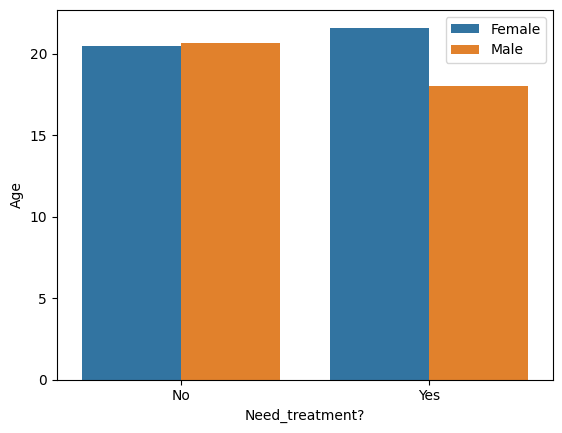

In [16]:
sns.barplot(x=df['Need_treatment?'], y=df['Age'],ci=None, hue=df['Gender'], orient='v')
plt.legend(loc='best')
plt.show()

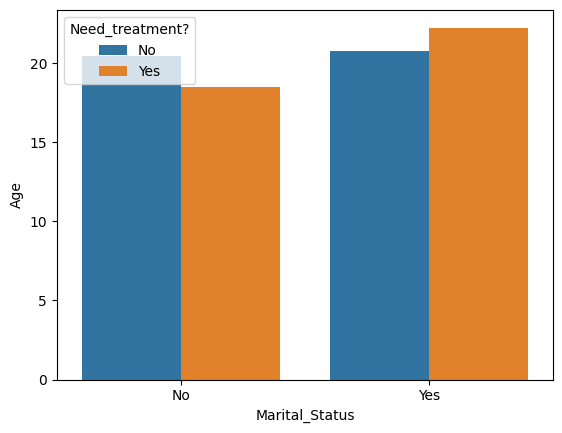

<Figure size 1000x600 with 0 Axes>

In [17]:
sns.barplot(x=df['Marital_Status'], y=df['Age'],ci=None,hue=df['Need_treatment?'])
plt.figure(figsize=(10,6))
plt.show()

# Apply label encoding on all the categorical columns

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le = LabelEncoder()

In [20]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])

df['Do_you_have_Depression?'] = le.fit_transform(df['Do_you_have_Depression?'])
df['Do_you_have_Anxiety'] = le.fit_transform(df['Do_you_have_Anxiety'])

df['Do_you_have_panic_Attack?'] = le.fit_transform(df['Do_you_have_panic_Attack?'])
df['Need_treatment?'] = le.fit_transform(df['Need_treatment?'])

In [21]:
df.head()

,Gender,Age,Marital_Status,Do_you_have_Depression?,Do_you_have_Anxiety,Do_you_have_panic_Attack?,Need_treatment?
0,0,18.0,0,1,0,1,0
1,1,21.0,0,0,1,0,0
2,1,19.0,0,1,1,1,0
3,0,22.0,1,1,0,0,0
4,1,23.0,0,0,0,0,0


# Encoded Results

# train test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X = df.drop(columns=['Need_treatment?'])
y = df['Need_treatment?']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
print(X_train)
X_train.shape

    Gender   Age  Marital_Status  Do_you_have_Depression?  \
11       0  24.0               1                        1   
48       1  24.0               0                        1   
86       0  19.0               0                        0   
28       0  24.0               1                        1   
94       0  24.0               0                        0   
..     ...   ...             ...                      ...   
61       0  19.0               0                        0   
72       0  19.0               1                        1   
14       0  18.0               0                        0   
93       0  18.0               0                        1   
52       0  19.0               0                        0   

    Do_you_have_Anxiety  Do_you_have_panic_Attack?  
11                    0                          0  
48                    0                          0  
86                    0                          0  
28                    1                          1  
94

(70, 6)

In [26]:
print(y_train)
y_train.shape

11    0
48    0
86    0
28    1
94    0
     ..
61    0
72    0
14    0
93    0
52    0
Name: Need_treatment?, Length: 70, dtype: int32


(70,)

In [27]:
print(X_test)
X_test.shape

    Gender   Age  Marital_Status  Do_you_have_Depression?  \
84       1  23.0               0                        0   
54       0  19.0               0                        1   
71       0  18.0               0                        0   
46       0  19.0               0                        0   
45       1  18.0               0                        0   
39       0  24.0               1                        1   
22       0  24.0               0                        0   
81       0  24.0               0                        0   
10       0  20.0               0                        0   
0        0  18.0               0                        1   
18       0  20.0               0                        0   
30       0  23.0               0                        0   
74       1  24.0               0                        0   
33       1  18.0               1                        1   
91       1  18.0               0                        0   
4        1  23.0        

(30, 6)

In [28]:
print(y_test)
y_test.shape

84    0
54    1
71    0
46    0
45    0
39    1
22    0
81    0
10    0
0     0
18    0
30    0
74    0
33    1
91    0
4     0
77    0
78    0
12    0
31    0
56    0
89    0
26    0
42    0
70    0
15    0
40    0
97    0
9     0
73    0
Name: Need_treatment?, dtype: int32


(30,)

In [29]:
from sklearn import set_config
set_config(display='diagram')

# Apply gaussian naive bayes

In [30]:
from sklearn.naive_bayes import GaussianNB

In [31]:
gnb = GaussianNB()

In [32]:
gnb.fit(X_train, y_train)

GaussianNB()

In [33]:
y_pred = gnb.predict(X_test)

In [34]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [35]:
y_test

84    0
54    1
71    0
46    0
45    0
39    1
22    0
81    0
10    0
0     0
18    0
30    0
74    0
33    1
91    0
4     0
77    0
78    0
12    0
31    0
56    0
89    0
26    0
42    0
70    0
15    0
40    0
97    0
9     0
73    0
Name: Need_treatment?, dtype: int32

# check the accuracy

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred)*100

86.66666666666667

In [38]:
np.round(accuracy_score(y_test, y_pred), 2)*100

87.0

# check accuracy via Confusion Matrix

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_test, y_pred)

array([[24,  3],
       [ 1,  2]], dtype=int64)

# Store this matrix

In [41]:
table = confusion_matrix(y_test, y_pred, labels=[0,1])
table

array([[24,  3],
       [ 1,  2]], dtype=int64)

# display the matix

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
display = ConfusionMatrixDisplay(confusion_matrix = table, display_labels=['0: Not Needed (Pos)', '1: Needed (Neg)'])

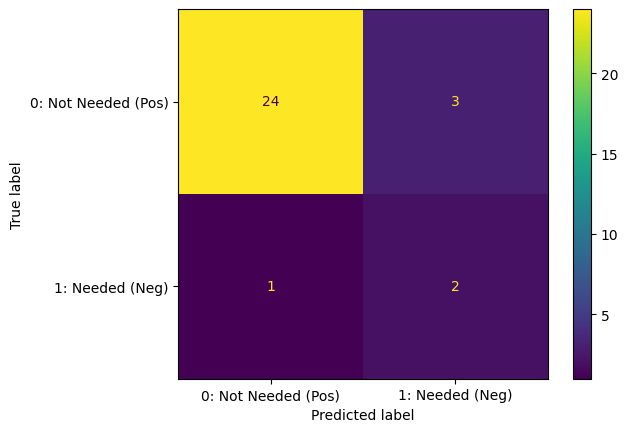

In [44]:
display.plot()

In [45]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

In [46]:
print('True Negative:', tn)
print('False Positive:', fp)
print('False Negative:', fn)
print('True Positive:', tp)

True Negative: 24
False Positive: 3
False Negative: 1
True Positive: 2


# Save the Model

In [47]:
import joblib
model = joblib.dump(gnb, 'Gaussian_Naive_Bayes_Classifier')

In [48]:
model

['Gaussian_Naive_Bayes_Classifier']

# Use the model for prediction

In [49]:
final_model = joblib.load('Gaussian_Naive_Bayes_Classifier')

In [50]:
final_model

GaussianNB()

In [51]:
final_model.predict(X_test)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0])

In [52]:
df.head(2)

,Gender,Age,Marital_Status,Do_you_have_Depression?,Do_you_have_Anxiety,Do_you_have_panic_Attack?,Need_treatment?
0,0,18.0,0,1,0,1,0
1,1,21.0,0,0,1,0,0


In [55]:
def pred():
    Gender = int(input('Enter the Gender of a person:\n'))
    Age = int(input('Enter the age of the person:\n'))
    
    Marital_Status = int(input('Enter the Marital_Status of a person:\n'))
    Do_you_have_Depression = int(input('Enter weather person having Depression?:\n'))
    
    Do_you_have_Anxiety = int(input('Enter weather person is suffering from Anxiety?:\n'))
    Do_you_have_panic_Attack = int(input('Enter weather person is having panick attack?:\n'))
    
    input_data = np.array([[Gender, Age, Marital_Status, Do_you_have_Depression, Do_you_have_Anxiety, Do_you_have_panic_Attack]])
    prediction = gnb.predict(input_data)
    
    return prediction    

In [54]:
pred()

Enter the Gender of a person:
0
Enter the age of the person:
23
Enter the Marital_Status of a person:
1
Enter weather person having Depression?:
1
Enter weather person is suffering from Anxiety?:
1
Enter weather person is having panick attack?:
1


C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [56]:
pred()

Enter the Gender of a person:
1
Enter the age of the person:
1
Enter the Marital_Status of a person:
0
Enter weather person having Depression?:
1
Enter weather person is suffering from Anxiety?:
0
Enter weather person is having panick attack?:
0


C:\Users\Rohan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])